# Assignment 2: Neural networks for classification

The goal of this assignment is to get familiar with the Keras neural networks API. You will implement a neural network for (non-medical) image classification example — classification of images of handwritten digits, and perform some basic experiments and analysis. 

In this assignment, you will run trough Python code that demonstrates how to train a neural network for handwritten digit recognition. For this purpose, we are going to use the well-known [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

The neural network is implemented in the Keras neural networks API. An overview of the Keras API was given during the introductory lectures. More details can be found in the [Keras API documentation](https://keras.io/).

### Preliminaries

The first step in the implementation is to import all the Python modules that will be used throughout the code:


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import winsound
import os
import seaborn as sns

Here is a brief description of the modules and functions that are imported:
- NumPy is a Python library for scientific computing. You can think of it as a libarary that implements MATLAB-like functionality in Python, although note that NumPy is not a Matlab clone. This is a NumPy cheatsheat for MATLAB users that you might find useful: https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

- matplotlib.pyplot is a module that provides MATLAB-style plotting in Python. The pyplot documentation can be found here: https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot

- scikit-learn is a machine learning library for Python. From this library we are going to use the `train_test_split` function that is documented here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- Finally, we import a number of modules from the Keras API.

### Loading the MNIST dataset

The following lines of code use the builtin Keras method to load the MNIST dataset that is already split into training and test sets and then visualizes some example images:


Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


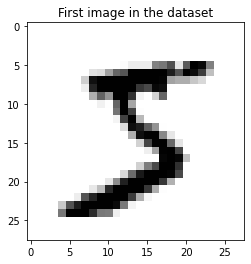

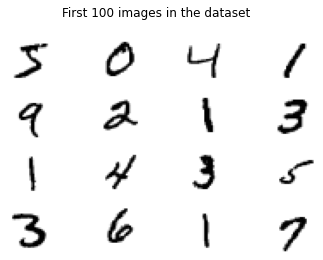

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [2]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)   
    plt.axis('off')
fig.suptitle('First 100 images in the dataset')
plt.show()

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])


### Data preprocessing

The next step is to preprocess the data, i.e. prepare it in a format that will make it easy to train and evaluate machine learning models such as neural networks. The MNIST dataset already is split into a training and validation sets, however, we will also require a validation set to monitor for overfitting (and perform model selection). 

In [3]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)


print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


We can plot the distribution of the class labels in the new training and validation sets and make sure they are similarly distributed. 

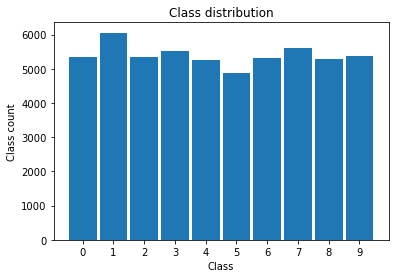

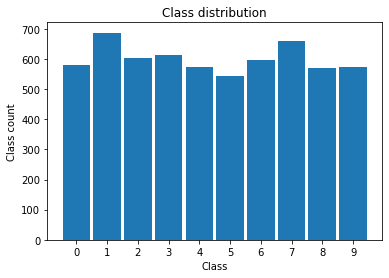

In [4]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train)

# show the class label distribution in the validation dataset
plt_classes(y_val)

The following lines of code reshape the MNIST dataset to the appropriate format, convert the dataset to float32 data type (from uint8) and finally normalize to the intensity values to the [0, 1] range.

In [5]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

The MNIST classification problem has 10 classes, one for each digit. Thus, the output neural network should have 10 output neurons, each one corresponding to one of the classes. This means that the targets that will be used to train the network must be 10-dimensional vectors so they are directly comparable to the output neurons. This can be achieved by one-hot encoding of the class labels, which is performed in the code below. 

In [6]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train[:20]) 


# convert 1D class arrays to 10D class matrices
y_train_0 = to_categorical(y_train, 10)
y_val_0 = to_categorical(y_val, 10)
y_test_0 = to_categorical(y_test, 10)


# check the output
print(y_train_0.shape)
# this is now a one-hot encoded matrix
print(y_train_0[:20]) 

(54000,)
[1 3 9 2 7 8 7 5 9 6 7 6 6 5 1 2 3 5 7 2]
(54000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


### Building a neural network classification model

Now that the input (images) and output (targets) data is prepared, we can proceed to defining the neural network model that will later be trained with the data. Note that we use a sequential Keras model and the first layer of the model flattens the input images (converts them to 1D arrays). 

The neural network consists of one input layer, one hidden layer of 64 neurons activated with a ReLU nonlinearity, and one output layer activated with a softmax nonlinearity. 


In [7]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 


### Training the model

Finally, the model can be trained trained with stochastic gradient descent.

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="my_first_model"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model.fit(X_train, y_train_0, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_0), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.8250 - val_loss: 0.4212 - val_accuracy: 0.8815
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3538 - accuracy: 0.9028 - val_loss: 0.3466 - val_accuracy: 0.9008
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3017 - accuracy: 0.9152 - val_loss: 0.3068 - val_accuracy: 0.9113
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2705 - accuracy: 0.9240 - val_loss: 0.2787 - val_accuracy: 0.9248
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9297 - val_loss: 0.2611 - val_accuracy: 0.9270
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2308 - accuracy: 0.9351 - val_loss: 0.2448 - val_accuracy: 0.9307
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2163 - accuracy: 0.9394 - val_loss: 0.2331 - val_accuracy:

### Training and validation loss curves in TensorBoard

In the call to the `model.fit()` method, we provided a TensorBoard callback function as a parameter. This function logs the training process. The generated logs can be used to plot the training and validation loss and accuracy curves. 

You can start TensorBoard by calling the following commands from the Anaconda Prompt command line:

````bash
activate 8p361
cd C:\Users\20192735\OneDrive - TU Eindhoven\8P361 - Project Imaging\8p361-project-imaging-master\assignments
tensorboard --logdir logs
````

This will start TensorBoard. While TensorBoard is running, you can navigate your browser to http://localhost:6006/ to visualize the training and validation loss curves.

If you use different names for your trained models, you can easily compare their loss and accuracy curves in TensorBoard. 

### Evaluate the performance of the trained model

In [9]:
score = model.evaluate(X_test, y_test_0, verbose=0)


print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.18066808581352234
Accuracy:  0.9474999904632568


### Before you start with the exercises...

While this Python notebook such as this one can be very useful tools for presenting code in an instructive way, they can be a bit inconvenient for performing and keeping track of large number of experiments (such as experiments with different neural network architecture). The Python file `mlp.py` contains all the code from this notebook minus the analysis and visualization experiments. You can use this code as the basis of the experiments you need to perform in the exercises.

In [10]:
file_out = r"C:\Users\20192735\OneDrive - TU Eindhoven\8P361 - Project Imaging\8p361-project-imaging-master\assignments\Experiments_assignment_2.1.txt"

## Exercise 1

The example neural network classification model in this assignment is relatively simple — it contains a single hidden layer of 64 neurons. 

Perform a set of experiments with more complex models, e.g. with more layers (deeper models), more neurons per layer or a combination. 

Describe the set of experiments that you have performed. What is the accuracy of the best model? How did you determine which model is the best?

In [14]:
# convert 1D class arrays to 10D class matrices
y_train_1 = to_categorical(y_train, 10)
y_val_1 = to_categorical(y_val, 10)
y_test_1 = to_categorical(y_test, 10)

experiments = open(file_out, "w")


# fully connected layers with 64 neurons and ReLU nonlinearity
num_layers = [1, 2, 4, 8, 16]
num_neurons = [32, 64, 128, 256]
experiments_acc = []
experiments_loss = []
for i in num_layers:
    layer_acc = []
    layer_loss = []
    for j in num_neurons:
        model = Sequential()
        # flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
        model.add(Flatten(input_shape=(28,28,1))) 
        for k in range(i):
            model.add(Dense(j, activation='relu'))

        # output layer with 10 nodes (one for each class) and softmax nonlinearity
        model.add(Dense(10, activation='softmax')) 

        # compile the model
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

        # use this variable to name your model
        model_name= str("ReLU_activation_"+str(j)+"neurons_"+str(i)+"hidden_layers")

        # create a way to monitor our model in Tensorboard
        tensorboard = TensorBoard("logs/" + model_name)

        # train the model
        model.fit(X_train, y_train_1, batch_size=32, epochs=20, verbose=1, validation_data=(X_val, y_val_1), callbacks=[tensorboard])

        score = model.evaluate(X_test, y_test_1, verbose=0)

        print("Loss: ",score[0])
        print("Accuracy: ",score[1])
        
        layer_loss.append(score[0])
        layer_acc.append(score[1])

    experiments_acc.append(layer_acc)
    experiments_loss.append(layer_loss)

Epoch 1/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7288 - accuracy: 0.8131 - val_loss: 0.4393 - val_accuracy: 0.8800
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.8974 - val_loss: 0.3671 - val_accuracy: 0.8950
Epoch 3/20
1688/1688 [==============================] - 2s 982us/step - loss: 0.3207 - accuracy: 0.9099 - val_loss: 0.3281 - val_accuracy: 0.9080
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.9176 - val_loss: 0.3058 - val_accuracy: 0.9123
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9235 - val_loss: 0.2908 - val_accuracy: 0.9172
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2576 - accuracy: 0.9279 - val_loss: 0.2732 - val_accuracy: 0.9230
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2444 - accuracy: 0.9316 - val_loss: 0.2619 - val_accurac

Epoch 17/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1273 - accuracy: 0.9647 - val_loss: 0.1460 - val_accuracy: 0.9577
Epoch 18/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9662 - val_loss: 0.1418 - val_accuracy: 0.9582
Epoch 19/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1180 - accuracy: 0.9673 - val_loss: 0.1386 - val_accuracy: 0.9580
Epoch 20/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.9683 - val_loss: 0.1345 - val_accuracy: 0.9603
Loss:  0.12280798703432083
Accuracy:  0.9643999934196472
Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6557 - accuracy: 0.8400 - val_loss: 0.3985 - val_accuracy: 0.8912
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3360 - accuracy: 0.9073 - val_loss: 0.3273 - val_accuracy: 0.9045
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss:

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1198 - accuracy: 0.9657 - val_loss: 0.1396 - val_accuracy: 0.9597
Epoch 13/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9675 - val_loss: 0.1308 - val_accuracy: 0.9613
Epoch 14/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9702 - val_loss: 0.1297 - val_accuracy: 0.9633
Epoch 15/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1013 - accuracy: 0.9717 - val_loss: 0.1257 - val_accuracy: 0.9635
Epoch 16/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9731 - val_loss: 0.1248 - val_accuracy: 0.9623
Epoch 17/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0913 - accuracy: 0.9743 - val_loss: 0.1187 - val_accuracy: 0.9663
Epoch 18/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9754 - val_loss: 0.1151 - val_accuracy: 0.96

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1606 - accuracy: 0.9536 - val_loss: 0.1908 - val_accuracy: 0.9440
Epoch 8/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1474 - accuracy: 0.9568 - val_loss: 0.1728 - val_accuracy: 0.9488
Epoch 9/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1368 - accuracy: 0.9599 - val_loss: 0.1585 - val_accuracy: 0.9533
Epoch 10/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1270 - accuracy: 0.9627 - val_loss: 0.1572 - val_accuracy: 0.9545
Epoch 11/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1195 - accuracy: 0.9650 - val_loss: 0.1542 - val_accuracy: 0.9543
Epoch 12/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9671 - val_loss: 0.1430 - val_accuracy: 0.9567
Epoch 13/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1069 - accuracy: 0.9691 - val_loss: 0.1404 - val_accuracy: 0.9567

1688/1688 [==============================] - 4s 3ms/step - loss: 0.2534 - accuracy: 0.9255 - val_loss: 0.2355 - val_accuracy: 0.9283
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1936 - accuracy: 0.9438 - val_loss: 0.1838 - val_accuracy: 0.9462
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1573 - accuracy: 0.9539 - val_loss: 0.1683 - val_accuracy: 0.9485
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1323 - accuracy: 0.9613 - val_loss: 0.1430 - val_accuracy: 0.9582
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1129 - accuracy: 0.9675 - val_loss: 0.1253 - val_accuracy: 0.9632
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0973 - accuracy: 0.9716 - val_loss: 0.1110 - val_accuracy: 0.9658
Epoch 8/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0848 - accuracy: 0.9749 - val_loss: 0.1019 - val_accuracy: 0.9682
Epo

Epoch 18/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.1322 - val_accuracy: 0.9653
Epoch 19/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.1270 - val_accuracy: 0.9688
Epoch 20/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.1275 - val_accuracy: 0.9658
Loss:  0.11807388067245483
Accuracy:  0.9696999788284302
Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1968 - accuracy: 0.6375 - val_loss: 0.5738 - val_accuracy: 0.8198
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.9152 - val_loss: 0.2336 - val_accuracy: 0.9278
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1894 - accuracy: 0.9434 - val_loss: 0.1588 - val_accuracy: 0.9512
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1793 - accuracy: 0.9523 - val_loss: 0.2003 - val_accuracy: 0.9472
Epoch 14/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1583 - accuracy: 0.9578 - val_loss: 0.3689 - val_accuracy: 0.9102
Epoch 15/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1539 - accuracy: 0.9591 - val_loss: 0.2091 - val_accuracy: 0.9453
Epoch 16/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1441 - accuracy: 0.9614 - val_loss: 0.1983 - val_accuracy: 0.9500
Epoch 17/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1418 - accuracy: 0.9619 - val_loss: 0.2041 - val_accuracy: 0.9442
Epoch 18/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1454 - accuracy: 0.9620 - val_loss: 0.2906 - val_accuracy: 0.9212
Epoch 19/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1327 - accuracy: 0.9648 - val_loss: 0.1796 - val_accuracy: 0.95

1688/1688 [==============================] - 9s 6ms/step - loss: 0.0658 - accuracy: 0.9812 - val_loss: 0.1591 - val_accuracy: 0.9592
Epoch 9/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0524 - accuracy: 0.9854 - val_loss: 0.1158 - val_accuracy: 0.9682
Epoch 10/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9877 - val_loss: 0.1313 - val_accuracy: 0.9680
Epoch 11/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0379 - accuracy: 0.9891 - val_loss: 0.1245 - val_accuracy: 0.9700
Epoch 12/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0336 - accuracy: 0.9906 - val_loss: 0.1256 - val_accuracy: 0.9698
Epoch 13/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.1277 - val_accuracy: 0.9712
Epoch 14/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.1413 - val_accuracy: 0.966

NameError: name 'sns' is not defined

<Figure size 432x288 with 0 Axes>




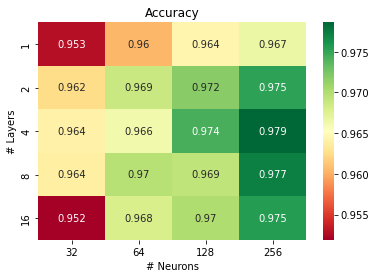

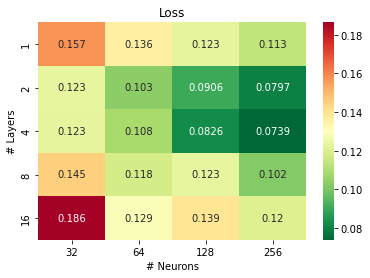

In [19]:
fig = plt.figure()
ax = sns.heatmap(experiments_acc, annot=True, cmap="RdYlGn", fmt='.3g', 
                 xticklabels=num_neurons, yticklabels=num_layers)
ax.set(xlabel='# Neurons', ylabel='# Layers')
ax.set_title("Accuracy")
fig = plt.figure()
ax = sns.heatmap(experiments_loss, annot=True, cmap="RdYlGn_r", fmt='.3g', 
                 xticklabels=num_neurons, yticklabels=num_layers)
ax.set(xlabel='# Neurons', ylabel='# Layers')
ax.set_title("Loss")
print('\a')

In [ ]:
#beep sound when run, to indicate finishing of code
winsound.Beep(1000,1000)

#### Answer with pictures from tensorboard

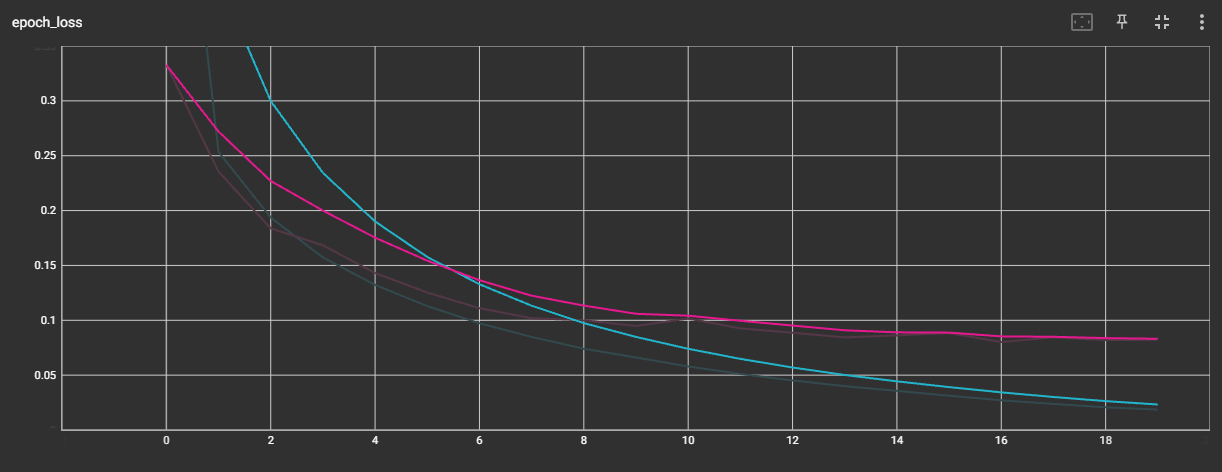
4 hidden layers with 256 ReLU activation neurons is overfitted, but had slightly better performance in loss and accuracy.

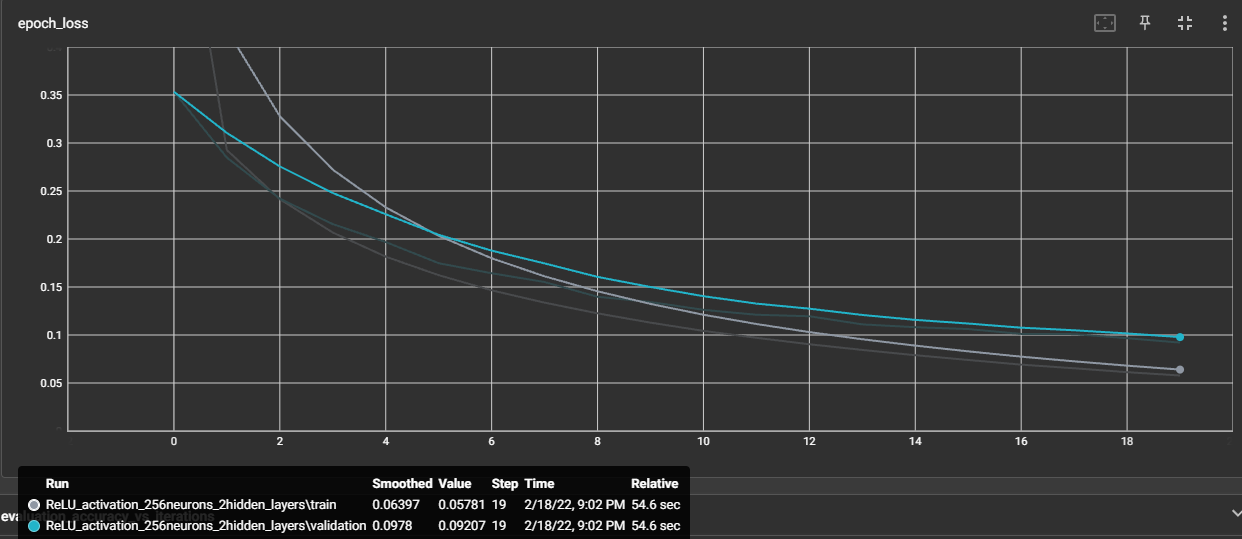
2 hidden layers with 256 ReLU activation neurons is alright. This is our best performing model, without overfitting (divergence between the validation and training data set at the final epochs. The loss on the test set is 0.0797 with an accuracy of 0.975.

## Exercise 2

Compare the performance of the following three models:
1. Neural netowrk without any hidden layers (the input layer connects directly to the output layer).
2. Neural network with 3 hidden layers with ReLU activations.
3. Neural network with 3 hidden layers with linear activations (i.e. without nonlinearities between the layers). 

Analyze the performance of the three models. What is the reason behind the difference in performance between the second and third models?


In [25]:
# convert 1D class arrays to 10D class matrices
y_train_2 = to_categorical(y_train, 10)
y_val_2 = to_categorical(y_val, 10)
y_test_2 = to_categorical(y_test, 10)


### NO HIDDEN LAYERS ###

model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 


# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="No_hidden_layers"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

# train the model
model.fit(X_train, y_train_2, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_2), callbacks=[tensorboard])

score = model.evaluate(X_test, y_test_2, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])


### 3 HIDDEN LAYERS + ReLU ACTIVATION ###

model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 


# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="ReLU_activation_3_hidden_layers"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

# train the model
model.fit(X_train, y_train_2, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_2), callbacks=[tensorboard])

score = model.evaluate(X_test, y_test_2, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])



### 3 HIDDEN LAYERS + LINEAR ACTIVATION ###

model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(64, activation='linear'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 


# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="linear_activation_3_hidden_layers"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

# train the model
model.fit(X_train, y_train_2, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_2), callbacks=[tensorboard])

score = model.evaluate(X_test, y_test_2, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8033 - accuracy: 0.8099 - val_loss: 0.5364 - val_accuracy: 0.8617
Epoch 2/10
1688/1688 [==============================] - 2s 969us/step - loss: 0.4658 - accuracy: 0.8784 - val_loss: 0.4524 - val_accuracy: 0.8772
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4098 - accuracy: 0.8898 - val_loss: 0.4173 - val_accuracy: 0.8855
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.8956 - val_loss: 0.3962 - val_accuracy: 0.8913
Epoch 5/10
1688/1688 [==============================] - 2s 944us/step - loss: 0.3645 - accuracy: 0.8991 - val_loss: 0.3825 - val_accuracy: 0.8925
Epoch 6/10
1688/1688 [==============================] - 2s 924us/step - loss: 0.3520 - accuracy: 0.9025 - val_loss: 0.3729 - val_accuracy: 0.8943
Epoch 7/10
1688/1688 [==============================] - 2s 927us/step - loss: 0.3427 - accuracy: 0.9046 - val_loss: 0.3635 - val_a

### Answers

1. Neural netowrk without any hidden layers (the input layer connects directly to the output layer).<br>
a. Loss: 0.311 <br>
b. Accuracy: 0.915

2. Neural network with 3 hidden layers with ReLU activations.<br>
    a. Loss: 0.112<br>
    b. Accuracy: 0.965<br>
3. Neural network with 3 hidden layers with linear activations (i.e. without nonlinearities between the layers).<br>
    a. Loss: 0.278<br>
    b. Accuracy: 0.923

Model 1 performs the worst 3 after that, model 2 performs the best.

The performance difference between 3 and 2 stems from the activation function.
Use of a nonlinearity between layers allows recogonition of complex patterns, when a linearity is used, this behaviour is not seen. In such, the model is able to recognize more complex behaviour and therefore classify more accurately.

## Exercise 3

Train a neural network model (the specific architecture is up to you) for a four class classification problem derived from MNIST in the following way:

- "vertical digits": 1, 7
- "loopy digits": 0, 6, 8, 9
- "curly digits": 2, 5
- "other": 3, 4

In [31]:
y_train_3= np.array([[i[1] or i[7], i[0] or i[6]or i[8] or i[9], i[2] or i[5], i[3] or i[4]] for i in y_train_0])
y_val_3 = np.array([[i[1] or i[7], i[0] or i[6]or i[8] or i[9], i[2] or i[5], i[3] or i[4]] for i in y_val_0])
y_test_3 = np.array([[i[1] or i[7], i[0] or i[6]or i[8] or i[9], i[2] or i[5], i[3] or i[4]] for i in y_test_0])

# convert 1D class arrays to 4D class matrices
#y_train_3 = to_categorical(y_train, 4)
#y_val_3 = to_categorical(y_val, 4)
#y_test_3 = to_categorical(y_test, 4)

model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# output layer with 4 nodes (one for each class) and softmax nonlinearity
model.add(Dense(4, activation='softmax')) 

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="Model_Exercise_3"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

# train the model
model.fit(X_train, y_train_3, batch_size=32, epochs=20, verbose=1, validation_data=(X_val, y_val_3), callbacks=[tensorboard])

score = model.evaluate(X_test, y_test_3, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5341 - accuracy: 0.8073 - val_loss: 0.3162 - val_accuracy: 0.8970
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2398 - accuracy: 0.9246 - val_loss: 0.2213 - val_accuracy: 0.9288
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1776 - accuracy: 0.9441 - val_loss: 0.1996 - val_accuracy: 0.9368
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1450 - accuracy: 0.9543 - val_loss: 0.1742 - val_accuracy: 0.9432
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1233 - accuracy: 0.9604 - val_loss: 0.1469 - val_accuracy: 0.9548
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1075 - accuracy: 0.9661 - val_loss: 0.1303 - val_accuracy: 0.9593
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0955 - accuracy: 0.9699 - val_loss: 0.1183 - val_accuracy: